<a href="https://colab.research.google.com/github/Bigmee/Data-analysis-python-/blob/main/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Eze Chukwuemeka Joseph


In this Jupyter notebook,I will be building a real-life **data science project**  Particularly, I will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, I will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-12-03 15:54:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  97.1MB/s    in 0.8s    

2022-12-03 15:54:13 (97.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-

## **Load bioactivity data**

In [2]:
import pandas as pd

In [11]:
from google.colab import files

In [12]:
uploaded = files.upload()

Saving bioactivity_preprocessed_data.csv to bioactivity_preprocessed_data.csv


In [17]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [18]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [19]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [20]:
df2 = df[df.canonical_smiles.notna()] 

In [23]:
df2_lipinski = lipinski(df2.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [25]:
df2_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
190,310.422,3.91860,1.0,2.0
191,602.585,2.31218,4.0,13.0
192,402.519,5.25200,2.0,3.0
193,465.416,6.25150,1.0,2.0


In [26]:
df2

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,active,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,40.0
...,...,...,...,...
197,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,active,5370.0
198,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,3110.0
199,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,active,2180.0
200,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,active,3850.0


Now, let's combine the 2 DataFrame

In [27]:
df_combined = pd.concat([df2,df2_lipinski], axis=1)

In [28]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,390.0,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,210.0,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,80.0,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,active,1580.0,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,40.0,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
197,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,active,5370.0,NaN,NaN,NaN,NaN
198,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,3110.0,NaN,NaN,NaN,NaN
199,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,active,2180.0,NaN,NaN,NaN,NaN
200,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,active,3850.0,NaN,NaN,NaN,NaN


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [29]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [30]:
df_combined.standard_value.describe()

count       195.000000
mean      13131.579487
std       30065.957743
min           8.000000
25%         278.000000
50%        1720.000000
75%        5175.000000
max      100000.000000
Name: standard_value, dtype: float64

In [31]:
-np.log10( (10**-9)* 100000000 )

1.0

In [32]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [33]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [34]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-33-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,active,458.375,2.23320,8.0,11.0,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,40.0
...,...,...,...,...,...,...,...,...
197,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,active,NaN,NaN,NaN,NaN,5370.0
198,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,NaN,NaN,NaN,NaN,3110.0
199,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,active,NaN,NaN,NaN,NaN,2180.0
200,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,active,NaN,NaN,NaN,NaN,3850.0


In [35]:
df_norm.standard_value_norm.describe()

count       195.000000
mean      13131.579487
std       30065.957743
min           8.000000
25%         278.000000
50%        1720.000000
75%        5175.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [36]:
df_final = pIC50(df_norm)
df_final

<ipython-input-29-bf09df1ccbf9>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,active,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
197,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,active,NaN,NaN,NaN,NaN,5.270026
198,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,NaN,NaN,NaN,NaN,5.507240
199,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,active,NaN,NaN,NaN,NaN,5.661544
200,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,active,NaN,NaN,NaN,NaN,5.414539


In [37]:
df_final.pIC50.describe()

count    195.000000
mean       5.834262
std        0.998942
min        4.000000
25%        5.286398
50%        5.764472
75%        6.556135
max        8.096910
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [38]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,active,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
197,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,active,NaN,NaN,NaN,NaN,5.270026
198,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,NaN,NaN,NaN,NaN,5.507240
199,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,active,NaN,NaN,NaN,NaN,5.661544
200,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,active,NaN,NaN,NaN,NaN,5.414539


In [45]:
df_2class['bioactivity_class']

0      active
1      active
2      active
3      active
4      active
        ...  
197    active
198    active
199    active
200    active
201    active
Name: bioactivity_class, Length: 202, dtype: object

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [39]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

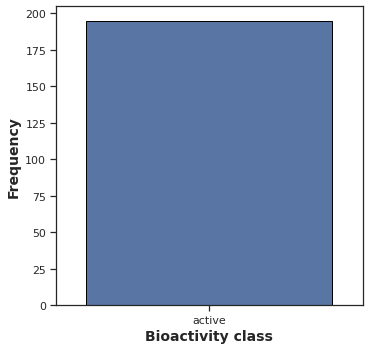

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

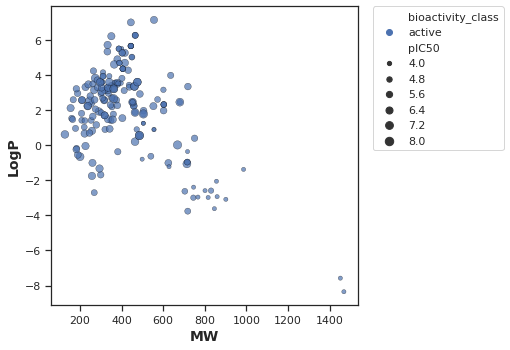

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

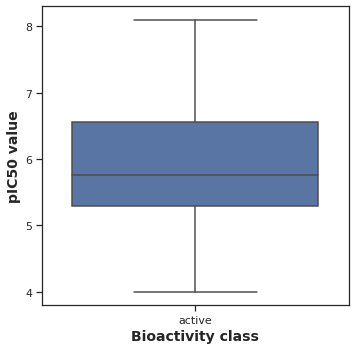

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [50]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [51]:
mannwhitney('pIC50')

ValueError: ignored

#### **MW**

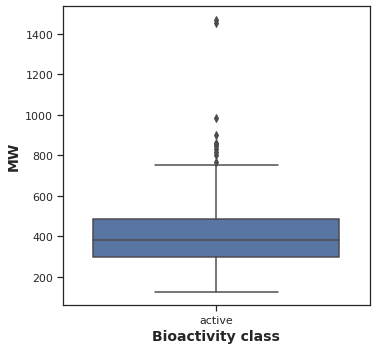

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [53]:
mannwhitney('MW')

ValueError: ignored

#### **LogP**

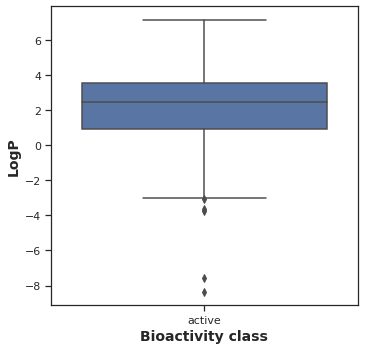

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [55]:
mannwhitney('LogP')

ValueError: ignored

#### **NumHDonors**

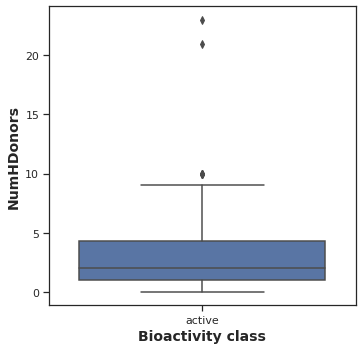

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [57]:
mannwhitney('NumHDonors')

ValueError: ignored

#### **NumHAcceptors**

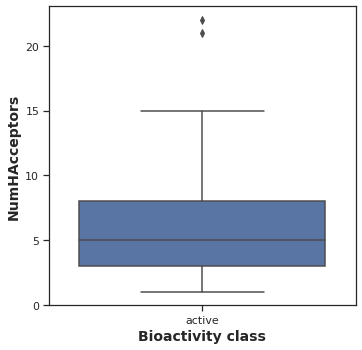

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [59]:
mannwhitney('NumHAcceptors')

ValueError: ignored

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [60]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: drive/MyDrive/NATIONAL GEOGRAPHIC LEARNING LEVEL 2 mock list.gsheet
	zip warning: name not matched: drive/MyDrive/SDR Pipeline: RWA 3 - Quality Bar Template.gsheet
Scanning files ....
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 11%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: bioactivity_preprocessed_data.csv (deflated 78%)
